### Import packages

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

### Read the data

In [3]:
train = pd.read_csv('./data/train.csv')
train_data = train.iloc[:, :-1]
train_label = train.iloc[:, -1]

test = pd.read_csv('./data/test.csv')
test_data = train.iloc[:, :-1]
test_label = train.iloc[:, -1]

### Exploratory Data Analysis
#### 1. Explore the dataset

In [4]:
train_data.head(1)

,ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,2945,1,1,4,12,1,1,1,4,3,...,0,0,8,8,8,12.75,0,12.4,0.5,1.79


In [5]:
test_data.head(1)

,ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,2945,1,1,4,12,1,1,1,4,3,...,0,0,8,8,8,12.75,0,12.4,0.5,1.79


#### 2. Dataset cleaning: remove the 'ID' column, which is irrelevant to our prediction

In [6]:
train_data = train_data.drop(train_data.columns[0], axis=1)
test_data = test_data.drop(test_data.columns[0], axis=1)

#### 3. Analyze the relationships between features (e.g., demographics, academic performance)

In [7]:
# order the columns according to the group
column_order = [
    'Marital status', 'Nacionality', 'Displaced', 'Gender',
    'Age at enrollment', 'International', "Mother's qualification",
    "Father's qualification", "Mother's occupation", "Father's occupation",
    'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Scholarship holder', 'Unemployment rate', 'Inflation rate', 'GDP',
    'Application mode', 'Application order', 'Course',
    'Daytime/evening attendance', 'Previous qualification',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)'
]
train_data_reordered = train_data[column_order]
test_data_reordered = test_data[column_order]

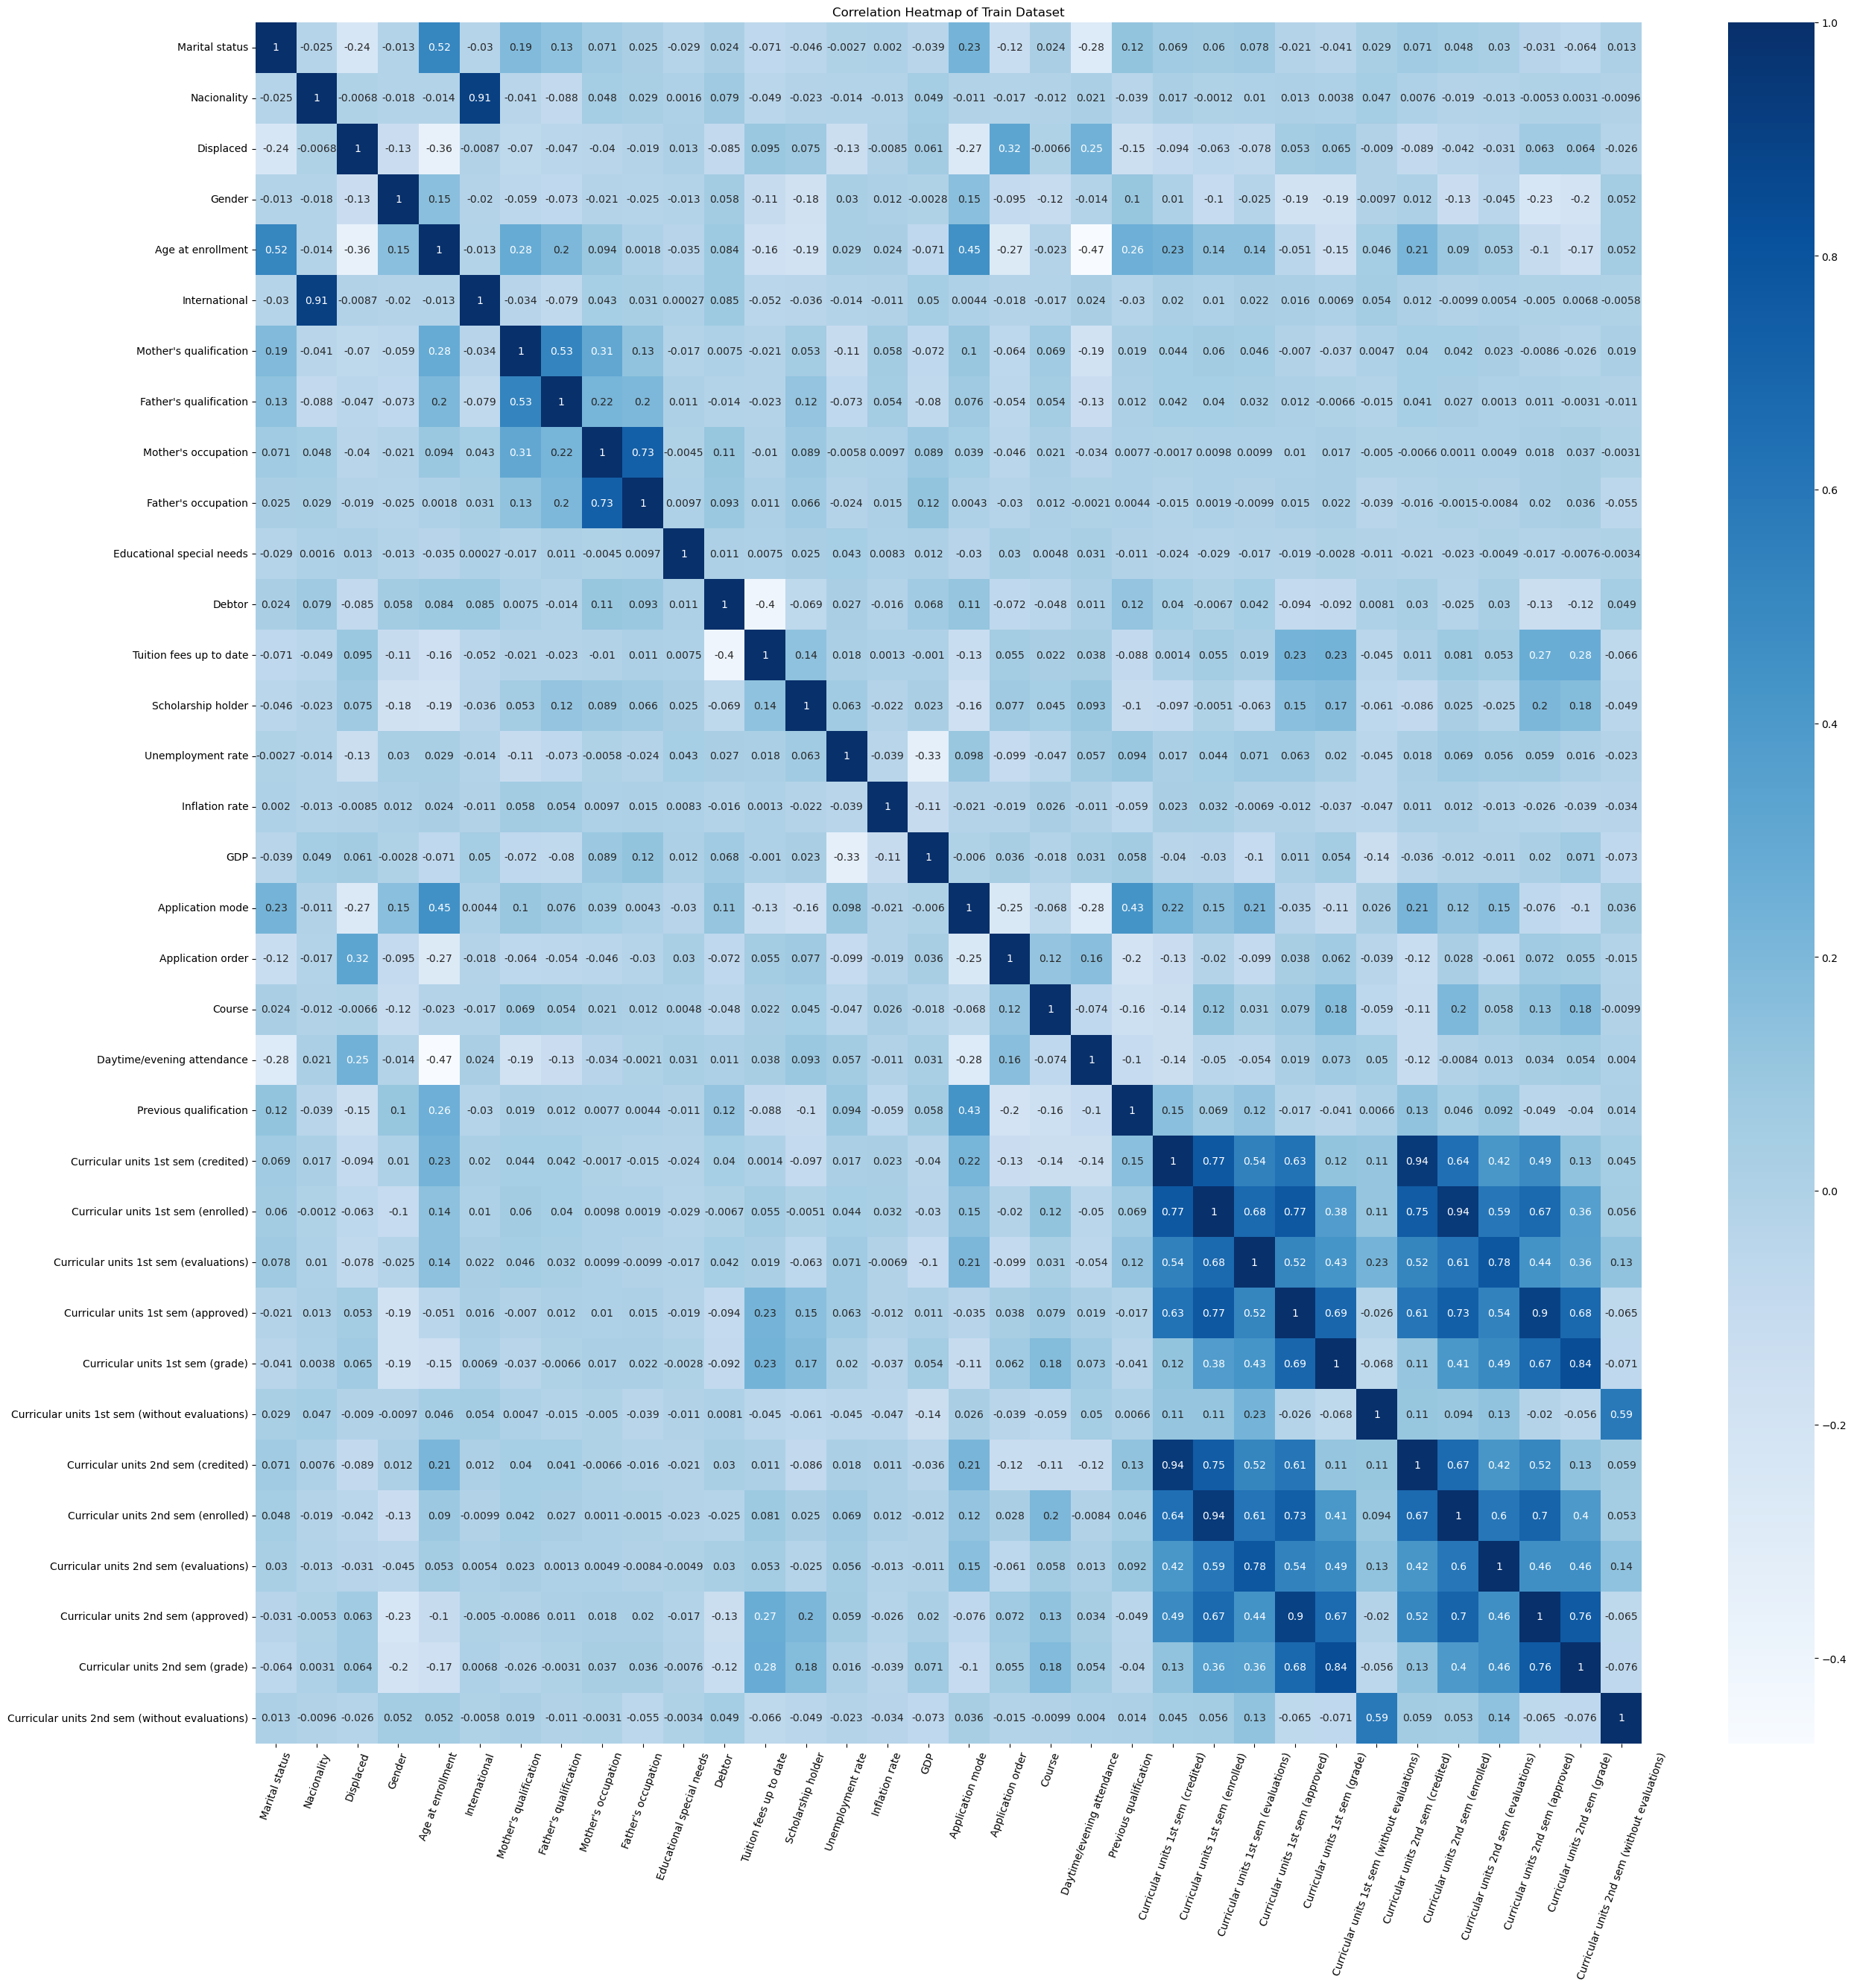

In [43]:
correlation_matrix = train_data_reordered.corr()
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True)
plt.title("Correlation Heatmap of Train Dataset")
plt.xticks(rotation=70)
plt.show()

In [ ]:
#### 3.1 Handle the collinearity (LASSO Regression)


#### 4. Visualization of categorical and continuous variables

In [15]:
categorial_variables = []
numeric_variables = []

categorial_variables = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 
            'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 
            'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 
            'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
numeric_variables = list(set(train_data_reordered.columns)-set(categorial_variables))

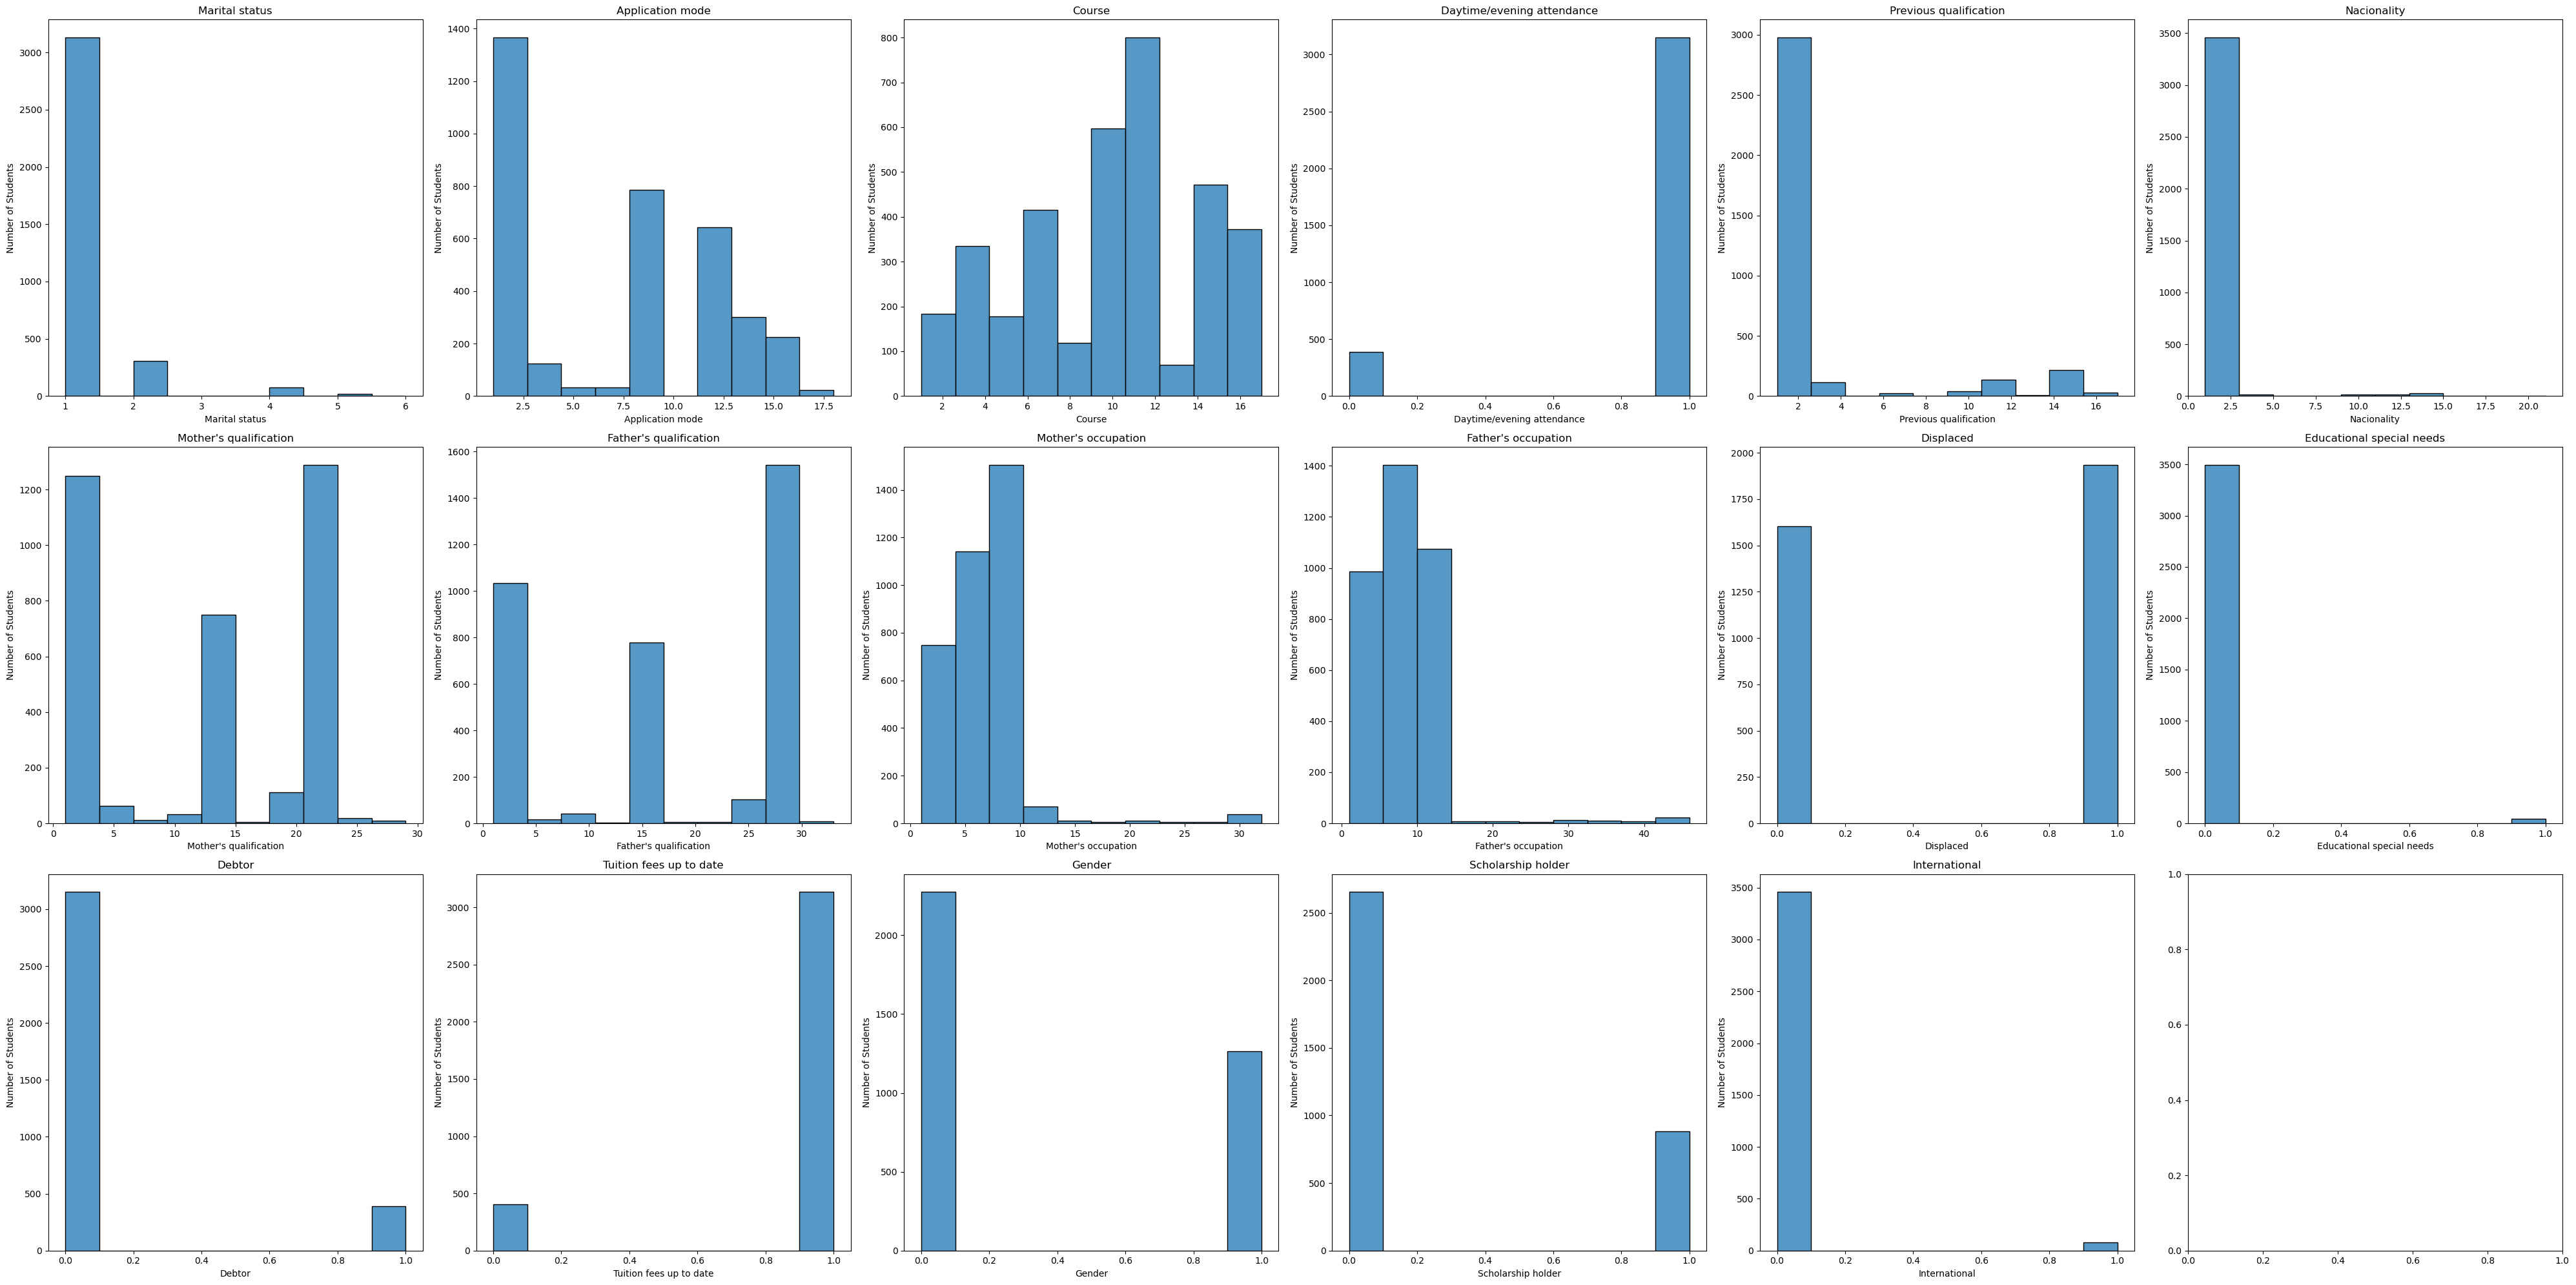

In [18]:
# categorial variables
fig, axes = plt.subplots(3, 6, figsize=(40, 20))
for k in range(len(categorial_variables)):
    sns.histplot(data=train, x=categorial_variables[k], ax=axes[k // 6, k % 6], bins=10, kde=False)
    axes[k // 6, k % 6].set_ylabel('Number of Students')
    axes[k // 6, k % 6].set_title(categorial_variables[k])
plt.tight_layout()
plt.show()

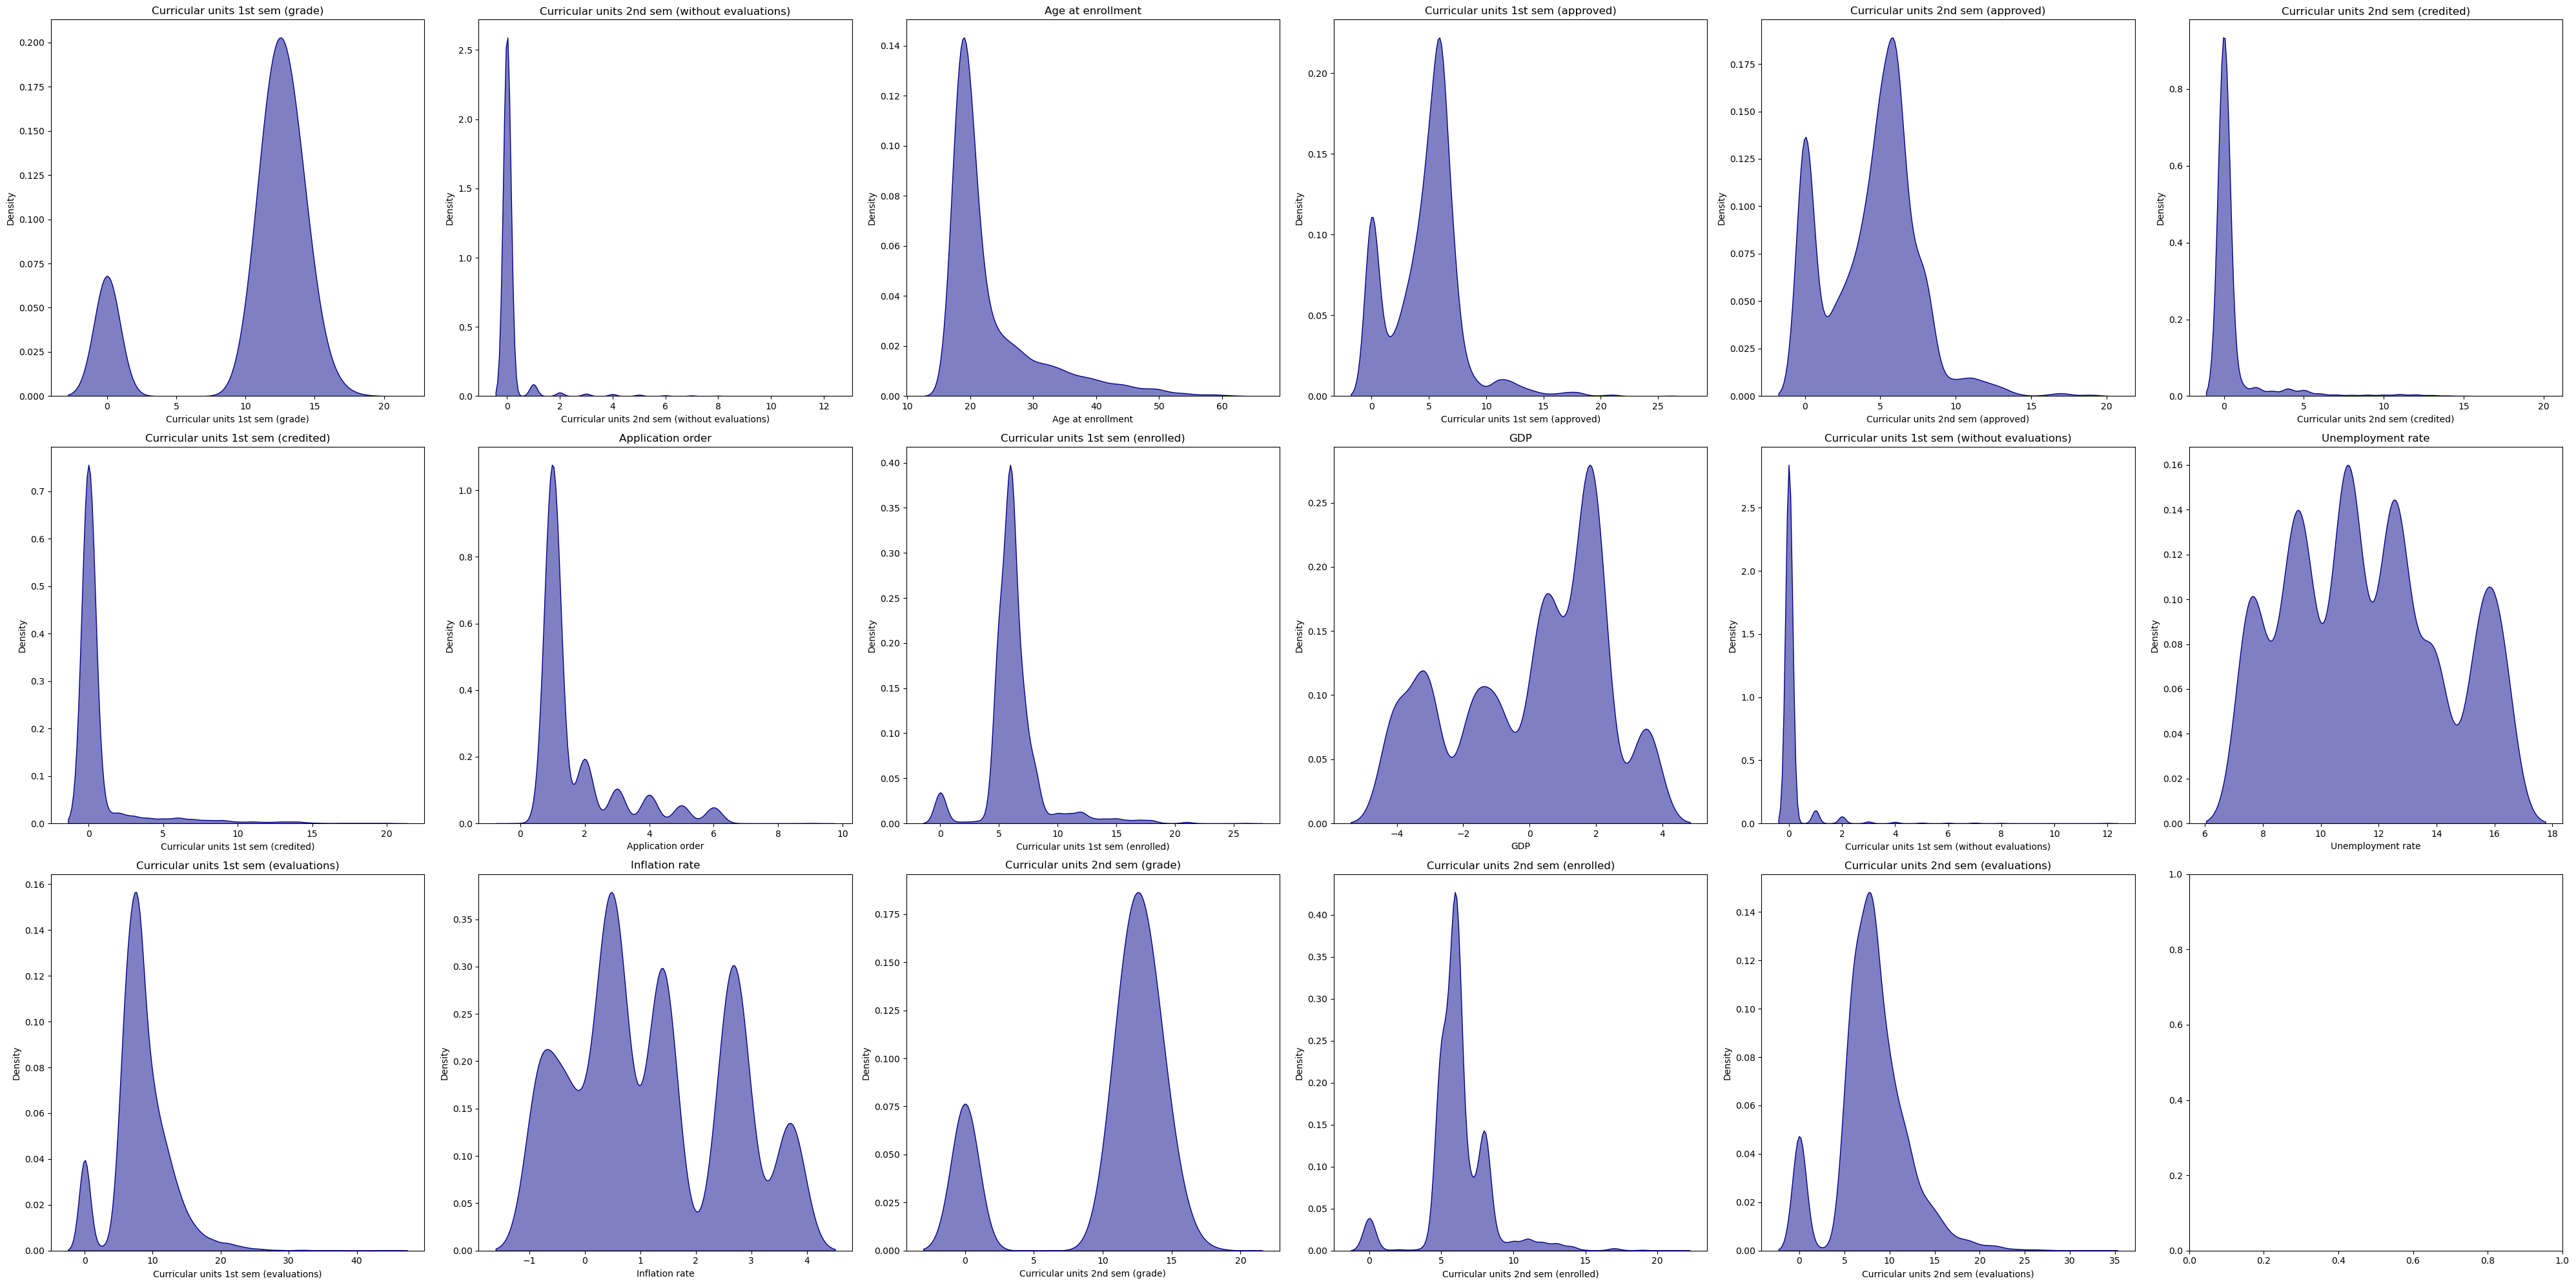

In [19]:
# numeric variables
fig, axes = plt.subplots(3, 6, figsize=(40, 20))
for k in range(len(numeric_variables)):
    sns.kdeplot(data=train, x=numeric_variables[k], ax=axes[k // 6, k % 6], fill=True, color='darkblue', alpha=0.5)
    axes[k // 6, k % 6].set_ylabel('Density')
    axes[k // 6, k % 6].set_title(numeric_variables[k])
plt.tight_layout()
plt.show()

#### 5. Normalization: Z-score standization

In [11]:
# from step 4, we found the overall distribution for variables approximate normal distribution
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)

#### 6. Encode categorical variables ("Target")

In [8]:
type_dict = {'Graduate':0, 'Dropout':1, 'Enrolled':2}
train_label = train_label.map(type_dict)
train_label.head(5)

0    0
1    1
2    0
3    0
4    1
Name: Target, dtype: int64

#### 7. Imbalanced Data: SMOTE

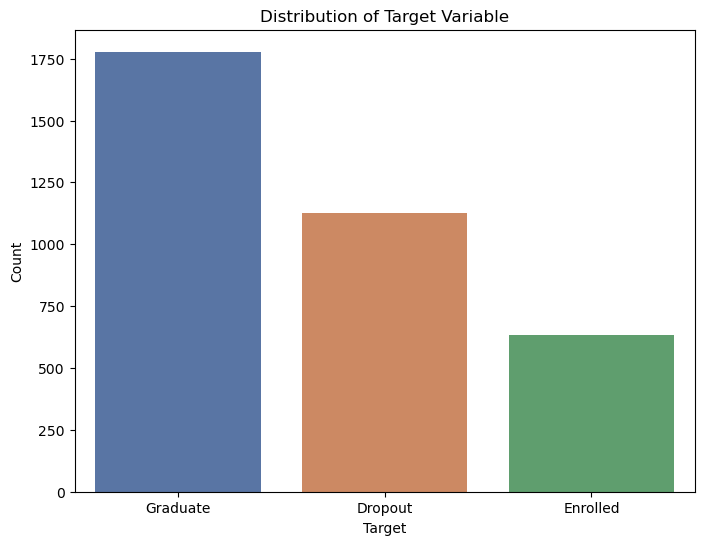

In [15]:
plt.figure(figsize=(8, 6))
palette = sns.color_palette("deep", 3)
sns.countplot(x='Target', data=train, palette=palette, hue='Target', legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

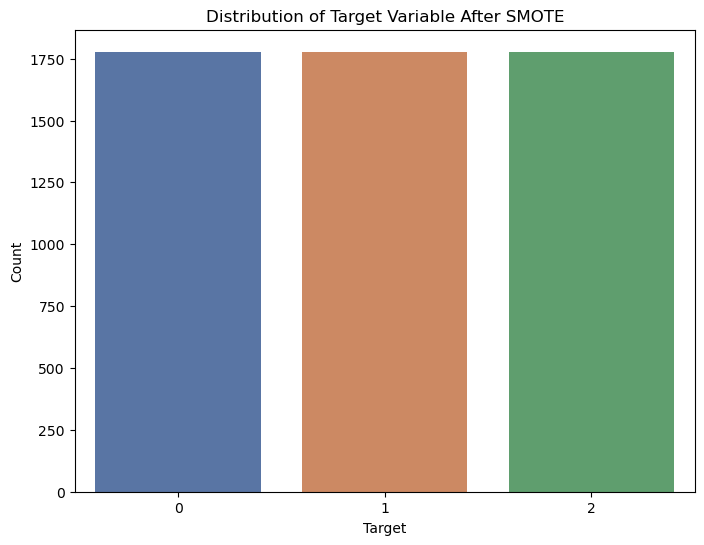

In [18]:
smote = SMOTE(random_state=42)
train_data_resampled, train_label_resampled = smote.fit_resample(train_data, train_label)
train_resampled = pd.concat([train_data_resampled, train_label_resampled], axis=1)

plt.figure(figsize=(8, 6))
palette = sns.color_palette("deep", 3)
sns.countplot(x='Target', data=train_resampled, palette=palette, hue='Target', legend=False)
plt.title('Distribution of Target Variable After SMOTE')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

### 1. Check NAs
### 2. Data reduction: remove outlier (没做)
### 3. Normalization: Z-score standization（）
### 4. Encode categorical variables
### 5. Engineer new features based on your insights from EDA??
### 6. Imbalanced Data: SMOTE
### 7. Multicollinearity: LASSO regression

In [68]:
# 1. Check NAs
train_na_summary = train_data_reordered.isna().sum()
print("Missing values in train_data_reordered:")
print(train_na_summary[train_na_summary > 0])

test_na_summary = test_data_reordered.isna().sum()
print("\nMissing values in test_data_reordered:")
print(test_na_summary[test_na_summary > 0])

Missing values in train_data_reordered:
Series([], dtype: int64)

Missing values in test_data_reordered:
Series([], dtype: int64)


ValueError: Could not interpret value `Attributes` for `x`. An entry with this name does not appear in `data`.

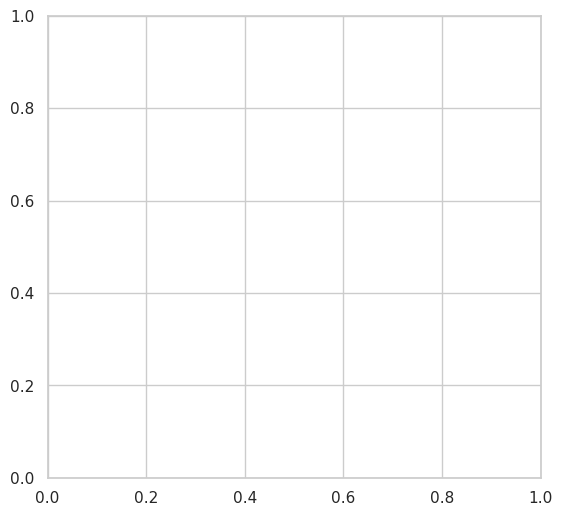

In [73]:
# 2. Data reduction: remove outlier


# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df.shape
s_df

# Changing the Target to numerical Value 0 or 1. 
#We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)
s_df.loc[:,'Target'].value_counts()

# mapping integer codes to new values
mapping = {0: 1, 2: 0}
s_df["Target"] = s_df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

x = s_df.drop(columns=['Target'], axis=1)
z = s_df["Target"]

In [ ]:
##准备数据集，进行机器学习